<font size="+3"><strong>Predicting Price with Size</strong></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In this project, you're working for a client who wants to create a model that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD.


In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    df.drop("Unnamed: 0", axis = 1, inplace = True)
    
    # Selection of Capital Federal
    cap_slt = df["place_with_parent_names"].str.contains("Capital Federal")
    
    # Selection of apartment
    apat_slt = df["property_type"] == "apartment"
    
    # Selection of apartments in Capital Federal having pric less than 4 lac
    price_usd_less_than_4lac = df["price_aprox_usd"] < 400_000
    
    # Removing Outliers
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    rem_outliers = df["surface_covered_in_m2"].between(low, high)
    
    df = df[cap_slt & apat_slt & price_usd_less_than_4lac & rem_outliers]
    return df

# Prepare Data

## Import

In the previous project, we cleaned our data files one-by-one. This isn't an issue when you're working with just three files, but imagine if you had several hundred! One way to automate the data importing and cleaning process is by writing a function. This will make sure that all our data undergoes the same process, and that our analysis is easily reproducible — something that's very important in science in general and data science in particular.

In [3]:
df = wrangle("C:\\Users\\Babar\\PycharmProject\\pythonProject\\WQ Uni Project 2\\Buenos Aires\\Buenos Aires 1.csv")
print("Shape is: ", df.shape)
df.head()

Shape is:  (1413, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constituci�n|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...


In [4]:
assert(len(df)<=8606)

In [5]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constituci�n|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...


In [6]:
cap_slt = df["place_with_parent_names"].str.contains("Capital Federal")
cap_slt.head()

0     True
4     True
9     True
29    True
40    True
Name: place_with_parent_names, dtype: bool

In [7]:
apat_slt = df["property_type"] == "apartment"
df["property_type"].head()

0     apartment
4     apartment
9     apartment
29    apartment
40    apartment
Name: property_type, dtype: object

In [9]:
price_usd_less_than_4lac = df["price_aprox_usd"] < 400_000
price_usd_less_than_4lac.shape

(1413,)

In [10]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constituci�n|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...


## Explore

We saw in the previous project that property size is an important factor in determining price. With that in mind, let's look at the distribution of apartment sizes in our dataset.

In [11]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

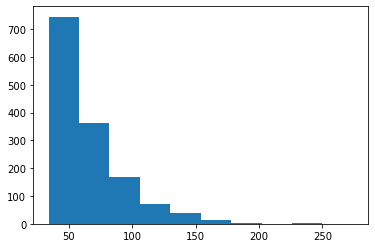

In [12]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel = "Area [sq meters]"
plt.title = "Distribution of Apartment Sizes"

When you see a histogram like the one above, it suggests that there are outliers in your dataset. This can affect model performance — especially in the sorts of linear models we'll learn about in this project. To confirm, let's look at the summary statistics for the "surface_covered_in_m2" feature.

In [13]:
df["surface_covered_in_m2"].describe()

count    1413.000000
mean       64.828733
std        30.411327
min        34.000000
25%        43.000000
50%        56.000000
75%        77.000000
max       274.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. The best thing to do is to change our wrangle function and remove them from the dataset.

In [14]:
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
rem_outliers = df["surface_covered_in_m2"].between(low, high)
rem_outliers.head()

0     False
4      True
9      True
29     True
40     True
Name: surface_covered_in_m2, dtype: bool

Add to your wrangle function so that it removes observations that are outliers in the "surface_covered_in_m2" column. Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "surface_covered_in_m2".

Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis "Area [sq meters]" and your y-axis "Price [USD]".

TypeError: 'str' object is not callable

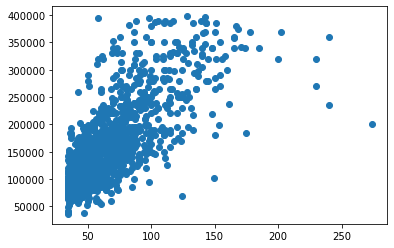

In [15]:
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel("Area Sq Meter", fontsize = 12)
plt.ylabel("Price in USD", fontsize = 12)
plt.title("Buenos Aires: Price vs. Area", fontsize = 17);

This plot suggests that there's a moderate positive correlation between apartment price and size. This means that if thing we want to predict is price, size will be a good feature to include.

## Split

A key part in any model-building project is separating your target (the thing you want to predict) from your features (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

Create the feature matrix named X_train, which you'll use to train your model. It should contain one feature only: ["surface_covered_in_m2"]. Remember that your feature matrix should always be two-dimensional.

In [16]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1413, 1)

Now that we have a features, the next step is to create a target. (By the way, you may have noticed that we're adding a _train tag to the variable names for our feature matrix and target vector. This is to remind us that this is the data we'll use to train our model, and not the data we'll use to test it.)

Create the target vector named y_train, which you'll use to train your model. Your target should be "price_aprox_usd". Remember that, in most cases, your target vector should be one-dimensional.

In [17]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1413,)

# Build Model

## Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be.

In [18]:
y_mean = round(y_train.mean(), 2)
y_mean

154146.4

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset.

Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y.

In [19]:
y_pred_baseline = [y_mean] * len(y_train)
len(y_pred_baseline) == len(y_train)

True

So how does our baseline model perform? One way to evaluate it is by plotting it on top of the scatter plot we made above.

Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".

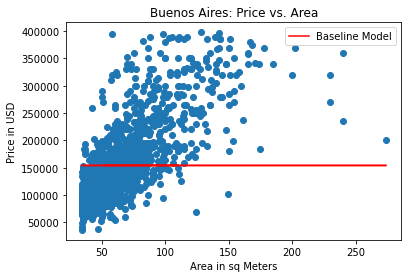

In [22]:
plt.plot(X_train, y_pred_baseline, color="Red", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area in sq Meters")
plt.ylabel("Price in USD")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate performance metric. There are lots of performance metrics, but the one we'll use here is the mean absolute error.

Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.

In [27]:
mae_baseline = round(mean_absolute_error(y_train, y_pred_baseline), 2)
mae_baseline
print("mean apartment price", y_mean)
print("Mean Absolute Error", mae_baseline)

mean apartment price 154146.4
Mean Absolute Error 58440.38


What does this information tell us? If we always predicted that an apartment price is $154146.4, our predictions would be off by an average of $58440.38. It also tells us that our model needs to have mean absolute error below $45,199.46 in order to be useful.

## Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. ☕️ Let's get started!

The first thing we need to do is create our model — in this case, one that uses linear regression.

Instantiate a LinearRegression model named model.

In [29]:
model = LinearRegression()

The second thing we need to do is use our data to train our model. Another way to say this is fit our model to the training data.

Fit your model to the data, X_train and y_train.

In [30]:
model.fit(X_train, y_train)

LinearRegression()

## Evaluate

The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.

Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this array y_pred_training.

In [33]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([238098.19245179, 163757.31003878, 111718.69234967, 134020.95707358,
       111718.69234967])

Now that we have predictions, we'll use them to assess our model's performance with the training data. We'll use the same metric we used to evaluate our baseline model: mean absolute error.

Calculate your training mean absolute error for your predictions in y_pred_training as compared to the true targets in y_train.

In [35]:
mae_training = round(mean_absolute_error(y_train, y_pred_training), 2)
mae_training

35938.73

In [46]:
X_test = pd.read_csv("C:\\Users\\Babar\\PycharmProject\\pythonProject\\WQ Uni Project 2\\Buenos Aires\\lab 1 features.csv")
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    121011.302651
1    135879.479134
2     96850.515867
3     96850.515867
4    111718.692350
dtype: float64

# Communicate Results

Extract the intercept from your model, and assign it to the variable intercept.

In [48]:
intercept = round(model.intercept_, 2)
print("Model Intercept is: ", intercept)

Model Intercept is:  33660.77


Next comes the coefficient. We'll extract it in a very similar way.

Extract the coefficient associated "surface_covered_in_m2" in your model, and assign it to the variable coefficient.

In [52]:
coefficient = round(model.coef_[0], 2)
print("coefficient is: ", coefficient)

coefficient is:  1858.52


Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.

In [53]:
print(f"apartment Price = {intercept} + {coefficient} * surface_covered")

apartment Price = 33660.77 + 1858.52 * surface_covered


Equation might work for some technical audiences, but visualization or generally much more effective communication tool — especially for non-technical audiences. So let's use the scatter plot we made at the beginning of this lesson and plot the line that that are equation would make.

Add a line to the plot below that shows the relationship between the observations in X_train and your model's predictions y_pred_training. Be sure that the line color is red, and that it has the label "Linear Model".

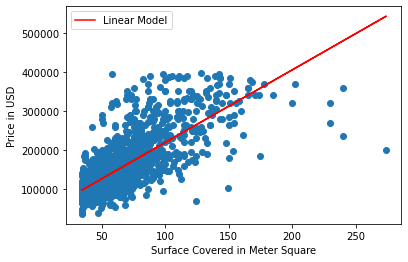

In [55]:

plt.plot(X_train, y_pred_training, color = "Red", label = "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Surface Covered in Meter Square")
plt.ylabel("Price in USD")
plt.legend();